In [1]:
import sys
from os import path as path
from string import replace
import numpy as np
import scipy.signal as signal
from netCDF4 import Dataset
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
from string import find
#import warnings
#warnings.filterwarnings("ignore")
import time

import glob
import xarray as xr
import matplotlib.gridspec as gridspec

from mpl_toolkits.basemap import Basemap

In [2]:
import matplotlib.style
mpl.style.use('classic')


# Loading the SWOT data:

In [3]:
filedir = '/Users/laura/PhD_private/data/SWOT_GM/'

input_filename = '/eNAtl60_hourly_GM_test02_science_c01_'

myfiles = sorted(glob.glob(filedir + input_filename + 'p*.nc'))
#myfiles = sorted(glob.glob(datadir + input_filename + 'c*.nc'))


In [3]:
len(myfiles)

7

In [4]:
myfiles

['/Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p011.nc',
 '/Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p024.nc',
 '/Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p026.nc',
 '/Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p039.nc',
 '/Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p052.nc',
 '/Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p067.nc',
 '/Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p080.nc']

# Individual plots:

##########--------------------------------
Input file: /Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p011.nc


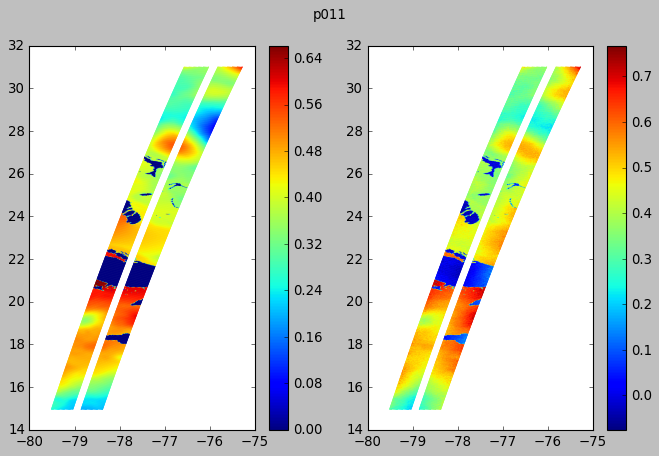

##########--------------------------------
Input file: /Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p024.nc


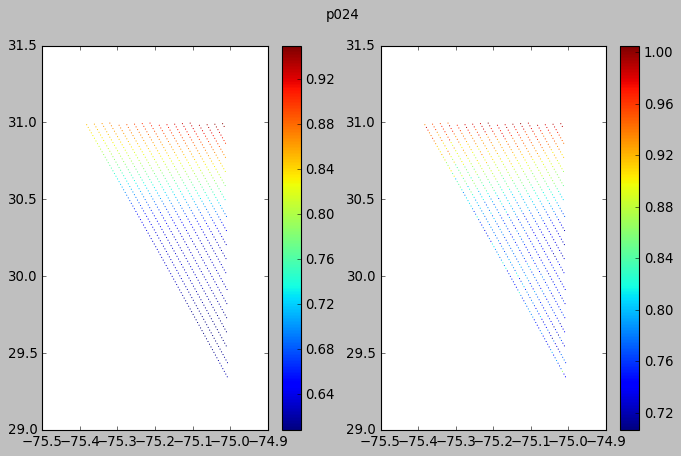

##########--------------------------------
Input file: /Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p026.nc


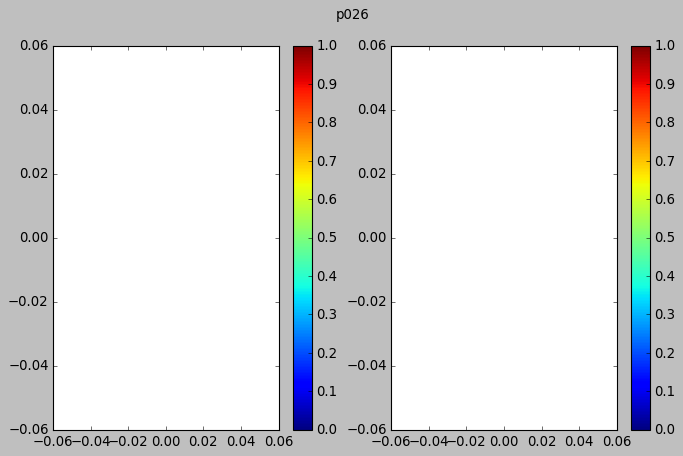

##########--------------------------------
Input file: /Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p039.nc


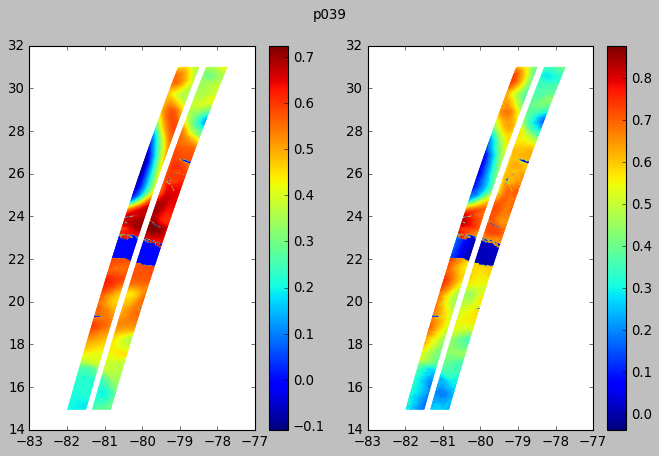

##########--------------------------------
Input file: /Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p052.nc


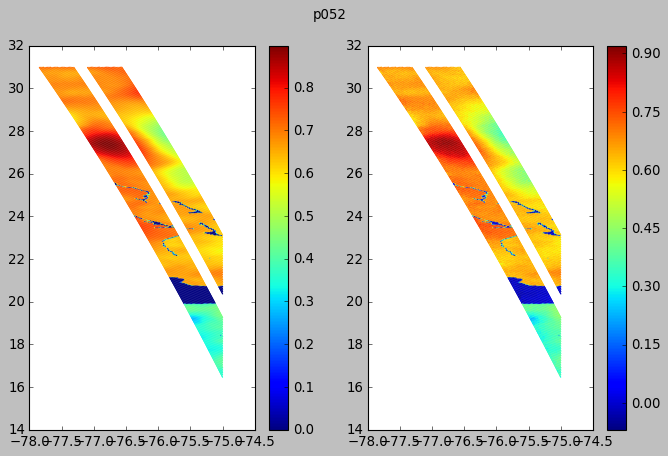

##########--------------------------------
Input file: /Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p067.nc


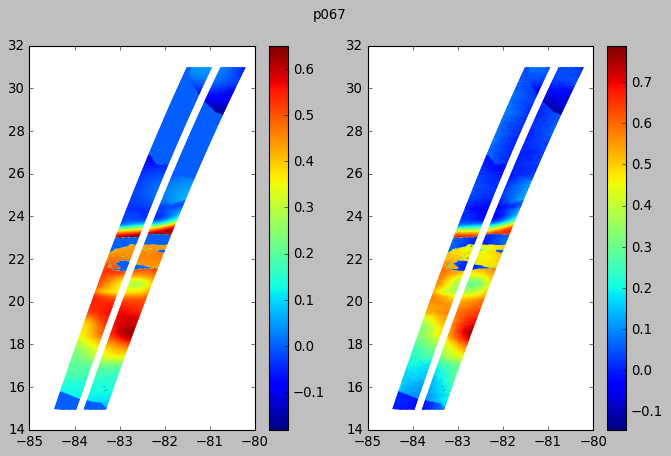

##########--------------------------------
Input file: /Users/laura/PhD_private/data/SWOT_GM/eNAtl60_hourly_GM_test02_science_c01_p080.nc


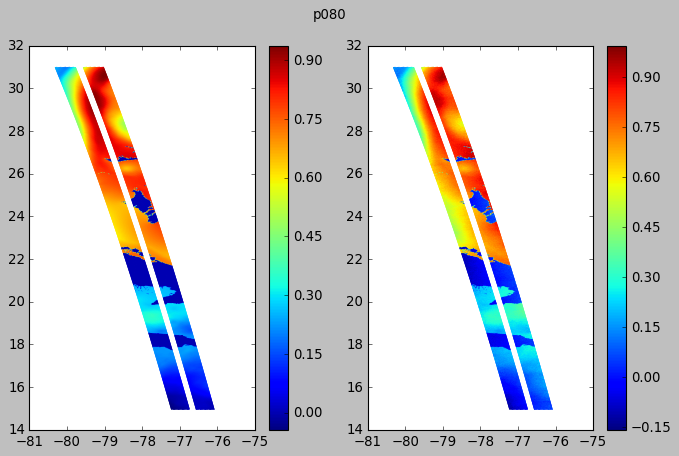

In [4]:
for ii, myfile in enumerate(myfiles):
    print '##########--------------------------------'
    print 'Input file: ' + myfile

    xds = xr.open_dataset(myfile, engine='netcdf4', lock=False)
    lat = xds.lat.data
    lon = xds.lon.data
    ssh_model = xds.ssh_model
    ssh_obs = xds.ssh_obs
    
    lon[lon > 180] -= 360 
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.scatter(lon, lat, s=1, c=ssh_model, linewidth=0)
    plt.title('SSH_model')
    plt.colorbar()
    plt.subplot(1,2,2)
    plt.scatter(lon, lat, s=1, c=ssh_obs, linewidth=0)
    plt.title('SSH_obs')
    plt.colorbar()
    plt.suptitle(myfiles[ii].split('c01_')[-1].split('.nc')[0])
    plt.show()

# Cummulative plot:

In [5]:
ssh_obs.shape

(1019, 52)

/Users/laura/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/laura/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1710: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/Users/laura/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/laura/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


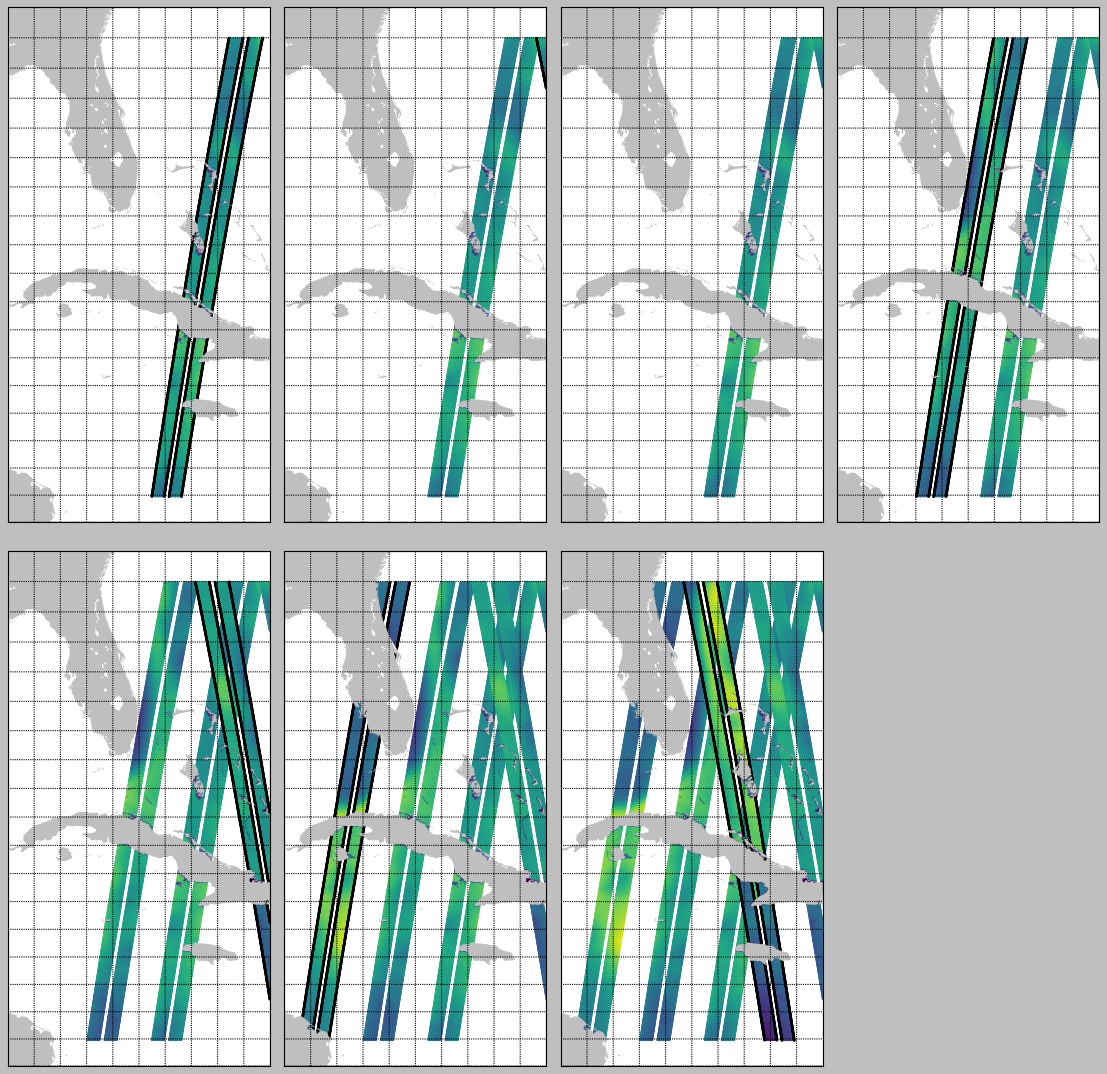

In [6]:
vmin = -0.6
vmax =  0.6

if __name__ == '__main__':
    cmap = 'viridis'

    gs = gridspec.GridSpec(2, 4)# width_ratios=[0.2, 0.2, 0.2, 0.2, 0.2], height_ratios=[1, 1, 1, 1, 1, 1])    
    
    fig1 = plt.figure(figsize=(14, 14))  # (w,h)
    
    #myfiles = [ x for x in myfiles if "132" not in x ]
    #myfiles = [ x for x in myfiles if "196" not in x ]
    
    #axc = plt.subplot(gs[:,-1])
    
    #steps = np.array([0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14])
    
    for jj in range(0, len(myfiles)):
        
        ax1 = plt.subplot(gs[jj]) #[steps[jj]])
        
        ##################################################
        # Map
        my_map = Basemap(projection='merc', lat_0=18, lon_0=-15, 
            resolution = 'i', area_thresh = 10.0,
            llcrnrlon=-85, llcrnrlat=14,
            urcrnrlon=-75, urcrnrlat=32, ax=ax1) 
        
        my_map.fillcontinents(color='0.75') 
        my_map.drawmapboundary()
        
        """
        if jj==0 or jj==3 or jj==6: 
            my_map.drawmeridians(np.arange(-160, 140, 1), labels=[0,0,0,0])
            my_map.drawparallels(np.arange(0, 70, 1), labels=[1,0,0,1])
        
        elif (jj==9):
            my_map.drawmeridians(np.arange(-160, 140, 1), labels=[1,0,0,1])
            my_map.drawparallels(np.arange(0, 70, 1), labels=[1,0,0,1])
        
        elif (jj==10 or jj==11):
            my_map.drawmeridians(np.arange(-160, 140, 1), labels=[1,0,0,1])
            my_map.drawparallels(np.arange(0, 70, 1), labels=[0,0,0,0])
        
        else:
            my_map.drawmeridians(np.arange(-160, 140, 1), labels=[0,0,0,0])
            my_map.drawparallels(np.arange(0, 70, 1), labels=[0,0,0,0])
        """
        my_map.drawmeridians(np.arange(-160, 140, 1), labels=[0,0,0,0])
        my_map.drawparallels(np.arange(0, 70, 1), labels=[0,0,0,0])
        
        #xt, yt   = my_map(0.22, 41.65)
        #xt2, yt2 = my_map(4.1, 36.3)
        
        for ii in range(0, jj+1): 
            myfile = myfiles[ii]

            with Dataset(myfile) as nc:

                lon      = nc.variables['lon'][:]
                lat      = nc.variables['lat'][:]
                #time_sat = nc.variables['time'][:]
                SSH_obs  = nc.variables['ssh_obs'][:]

            lon[lon > 180] -= 360

            SSH_obs = np.ma.masked_invalid(SSH_obs)  # to mask certain value
            
            yy, xx = SSH_obs.shape
            
            #SSH_obsnb, lonnb, latnb = noband(SSH_obs,lon,lat)
            #SSH_obsnb2 = SSH_obsnb - np.ma.mean(SSH_obsnb)

            SSH_obsnb = SSH_obs
            lonnb = lon
            latnb = lat
            SSH_obsnb2 = SSH_obsnb - np.ma.mean(SSH_obsnb)
            
            ny_t = SSH_obsnb.shape[0]; nx_t = SSH_obsnb.shape[1]
            lons_t, lats_t = my_map.makegrid(nx_t, ny_t) # get lat/lons of ny by nx evenly space grid.
            x, y = my_map(lons_t, lats_t) # compute map proj coordinates.

            c1 = my_map.scatter(lonnb, latnb, c=SSH_obsnb2, linewidth=0, vmin=vmin, vmax=vmax, s=2
                                , latlon=True, cmap=cmap) 
            
            c1.set_clim([vmin, vmax])
            if ii == jj:
                my_map.scatter(lonnb[:, 0], latnb[:, 0], c=SSH_obsnb2[:, 0], s=2, latlon=True) 
                my_map.scatter(lonnb[:, -1], latnb[:, -1], c=SSH_obsnb2[:, -1], s=2, latlon=True) 
                
                my_map.scatter(lonnb[:, xx/2 -1], latnb[:, xx/2 -1], c=SSH_obsnb2[:, xx/2 -1], s=2, latlon=True) 
                my_map.scatter(lonnb[:, xx/2], latnb[:, xx/2], c=SSH_obsnb2[:, xx/2], s=2, latlon=True) 
                #my_map.scatter(lonnb[:, 25], latnb[:, 25], c=SSH_obsnb2[:, 25], s=2, latlon=True) 
                
                #my_map.scatter(lonnb[:, 30], latnb[:, 30], c=SSH_obsnb2[:, 30], s=2, latlon=True) 
                #my_map.scatter(lonnb[:, 35], latnb[:, 35], c=SSH_obsnb2[:, 35], s=2, latlon=True) 
                #my_map.scatter(lonnb[:, 25], latnb[:, 25], c=SSH_obsnb2[:, 25], s=2, latlon=True) 
                
                my_map.scatter(lonnb[0, :], latnb[0, :], c=SSH_obsnb2[0, :], s=2, latlon=True) 
                my_map.scatter(lonnb[-1, :], latnb[-1, :], c=SSH_obsnb2[-1, :], s=2, latlon=True) 
        
        #if jj == len(myfiles) -1:
        #    my_map.drawmapscale(1.7, 36.3, 3.5, 36.5, 200, barstyle='fancy', yoffset=0.01*(my_map.ymax-my_map.ymin))
        
        #timen = np.mean(time_sat)
        #ptm = "Day   %2.1f" % (timen) 
        #plt.text(xt, yt, ptm, fontsize=14)
        #plt.text(xt2, yt2, 'Pass: ' + myfile[-6:-3], fontsize=14)        
            
    #cbar = plt.colorbar(c1, cax=axc, extend='both')
    #cbar.ax.tick_params(labelsize=20)

    plt.tight_layout()
    
    #savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'daily_inputs_cycle2_gradual.jpeg'
    #plt.savefig(str(savename), bbox_inches='tight', dpi=300)
    
    plt.show()



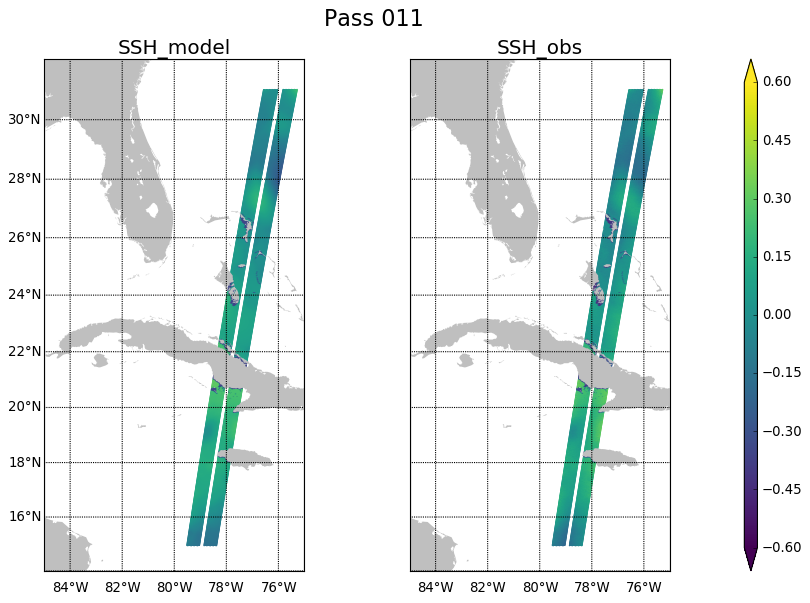

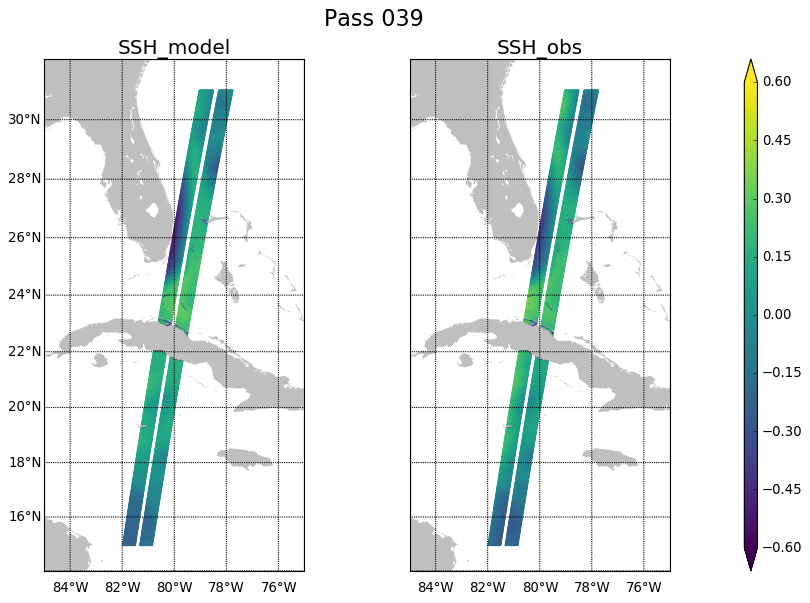

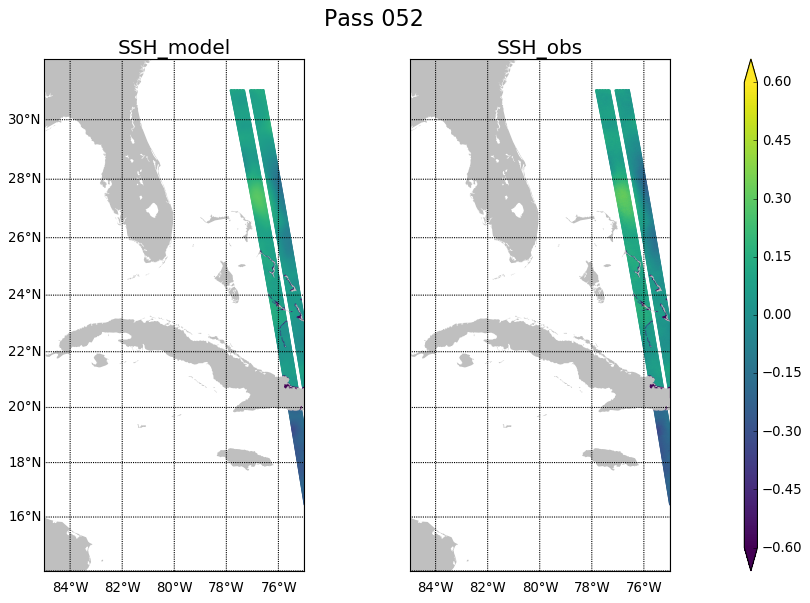

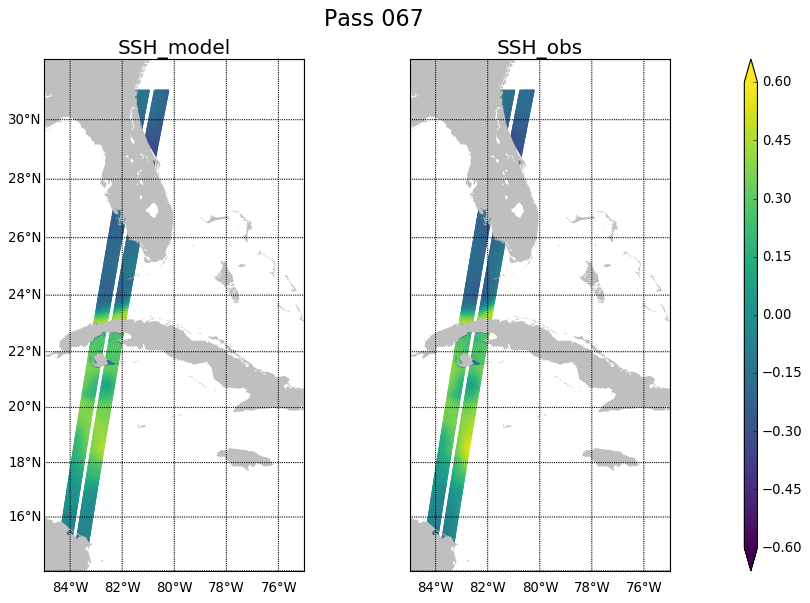

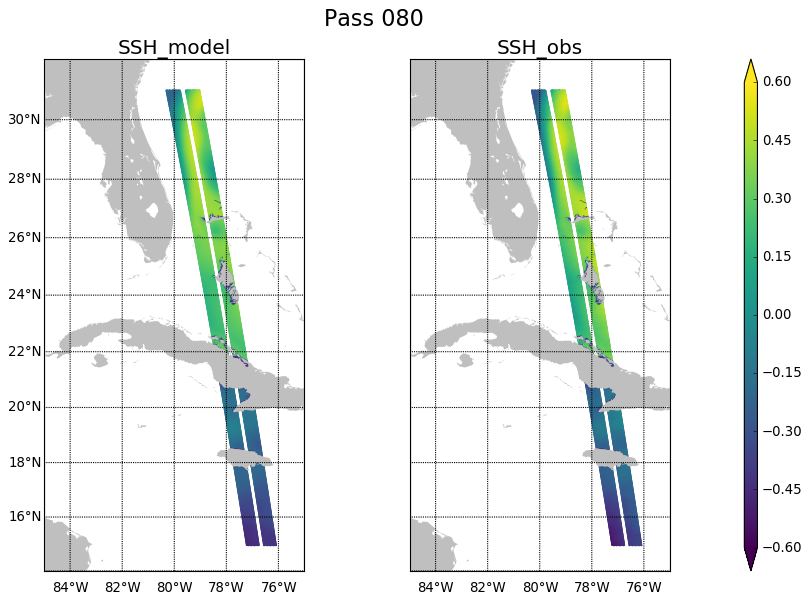

In [23]:
vmin = -0.6
vmax =  0.6

if __name__ == '__main__':
    cmap = 'viridis'
    
    myfiles = [ x for x in myfiles if "024" not in x ]
    myfiles = [ x for x in myfiles if "026" not in x ]
    
    for ii in xrange(0, len(myfiles)):
        fig1 = plt.figure(figsize=(12, 8))  # (w,h)
        fig1.patch.set_facecolor('None')

        gs = gridspec.GridSpec(1, 3, width_ratios=[0.49, 0.49, 0.02])#, height_ratios=[1, 1, 1, 1, 1, 1])    
        
        myfile = myfiles[ii]

        with Dataset(myfile) as nc:

            lon      = nc.variables['lon'][:]
            lat      = nc.variables['lat'][:]
            SSH_model  = nc.variables['ssh_model'][:]
            SSH_obs  = nc.variables['ssh_obs'][:]

        lon[lon > 180] -= 360
        SSH_model = np.ma.masked_invalid(SSH_model)  # to mask certain value
        SSH_obs = np.ma.masked_invalid(SSH_obs)  # to mask certain value

        yy, xx = SSH_obs.shape

        SSH_obsnb = SSH_obs
        lonnb = lon
        latnb = lat
        SSH_modelnb2 = SSH_model - np.ma.mean(SSH_model)
        SSH_obsnb2 = SSH_obsnb - np.ma.mean(SSH_obsnb)
        
        ##################################################
        ax1 = plt.subplot(gs[0])
        
        # Map 1
        my_map = Basemap(projection='merc', lat_0=18, lon_0=-15, 
            resolution = 'i', area_thresh = 10.0,
            llcrnrlon=-85, llcrnrlat=14,
            urcrnrlon=-75, urcrnrlat=32, ax=ax1) 

        my_map.fillcontinents(color='0.75') 
        my_map.drawmapboundary()

        my_map.drawmeridians(np.arange(-160, 140, 2), labels=[1,0,0,1])
        my_map.drawparallels(np.arange(0, 70, 2), labels=[1,0,0,1])
        
        # My map 1
        ny_t = SSH_obsnb.shape[0]; nx_t = SSH_obsnb.shape[1]
        lons_t, lats_t = my_map.makegrid(nx_t, ny_t) # get lat/lons of ny by nx evenly space grid.
        x, y = my_map(lons_t, lats_t) # compute map proj coordinates.

        c1 = my_map.scatter(lonnb, latnb, c=SSH_modelnb2, linewidth=0, vmin=vmin, vmax=vmax, s=2
                            , latlon=True, cmap=cmap) 
        
        c1.set_clim([vmin, vmax])
        ax1.set_title('SSH_model', size=18)
        
        ##################################################
        ax1 = plt.subplot(gs[1])
        
        # Map 1
        my_map = Basemap(projection='merc', lat_0=18, lon_0=-15, 
            resolution = 'i', area_thresh = 10.0,
            llcrnrlon=-85, llcrnrlat=14,
            urcrnrlon=-75, urcrnrlat=32, ax=ax1) 

        my_map.fillcontinents(color='0.75') 
        my_map.drawmapboundary()

        my_map.drawmeridians(np.arange(-160, 140, 2), labels=[1,0,0,1])
        my_map.drawparallels(np.arange(0, 70, 2), labels=[0,0,0,0])
        
        # My map 1
        ny_t = SSH_obsnb.shape[0]; nx_t = SSH_obsnb.shape[1]
        lons_t, lats_t = my_map.makegrid(nx_t, ny_t) # get lat/lons of ny by nx evenly space grid.
        x, y = my_map(lons_t, lats_t) # compute map proj coordinates.

        c1 = my_map.scatter(lonnb, latnb, c=SSH_obsnb2, linewidth=0, vmin=vmin, vmax=vmax, s=2
                            , latlon=True, cmap=cmap) 
        c1.set_clim([vmin, vmax])

        ax1.set_title('SSH_obs', size=18)
        
        # Colorbar:
        axC = plt.subplot(gs[2]) #[steps[jj]])

        cbar = plt.colorbar(c1, cax=axC, extend='both')
        #cbar.ax.tick_params(labelsize=16)
        
        tstr = 'Pass ' + myfiles[ii].split('c01_p')[-1].split('.nc')[0]
        plt.suptitle(tstr, size=20)

        #plt.tight_layout()
        
        #savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'daily_inputs_cycle2_gradual.jpeg'
        #plt.savefig(str(savename), bbox_inches='tight', dpi=300)

        plt.show()



# Individual SSH_model passes:

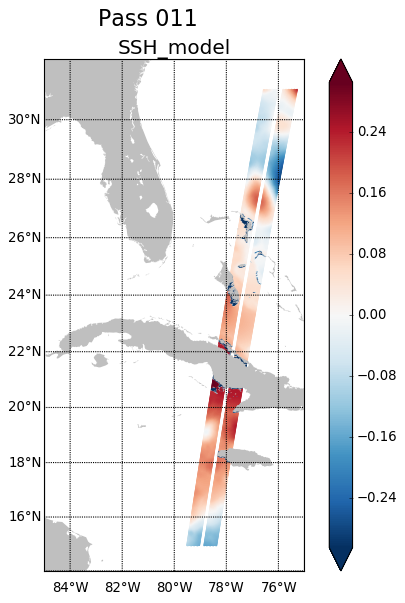

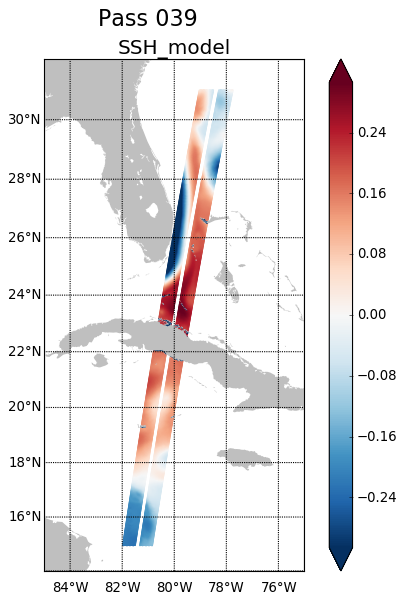

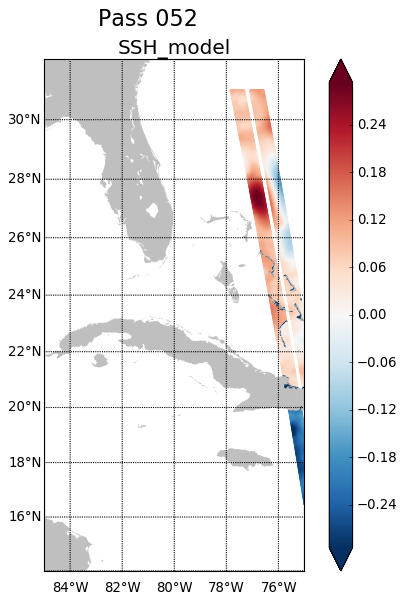

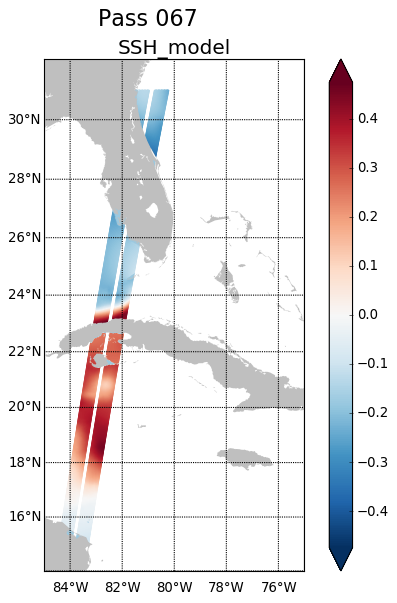

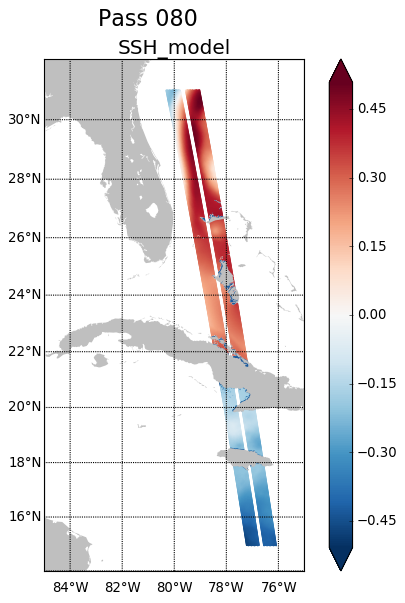

In [29]:
if __name__ == '__main__':
    cmap = 'RdBu_r'
    
    myfiles = [ x for x in myfiles if "024" not in x ]
    myfiles = [ x for x in myfiles if "026" not in x ]
    
    for ii in xrange(0, len(myfiles)):
        fig1 = plt.figure(figsize=(8, 8))  # (w,h)
        fig1.patch.set_facecolor('None')

        gs = gridspec.GridSpec(1, 3, width_ratios=[0.49, 0.49, 0.02])#, height_ratios=[1, 1, 1, 1, 1, 1])    
        
        myfile = myfiles[ii]

        with Dataset(myfile) as nc:

            lon      = nc.variables['lon'][:]
            lat      = nc.variables['lat'][:]
            SSH_model  = nc.variables['ssh_model'][:]
            SSH_obs  = nc.variables['ssh_obs'][:]

        lon[lon > 180] -= 360
        SSH_model = np.ma.masked_invalid(SSH_model)  # to mask certain value
        SSH_obs = np.ma.masked_invalid(SSH_obs)  # to mask certain value
        
        yy, xx = SSH_obs.shape

        SSH_obsnb = SSH_obs
        lonnb = lon
        latnb = lat
        SSH_modelnb2 = SSH_model - np.ma.mean(SSH_model)
        SSH_obsnb2 = SSH_obsnb - np.ma.mean(SSH_obsnb)
        
        vmax = SSH_modelnb2.max() 
        vmin = vmax*-1.
        
        ##################################################
        ax1 = plt.subplot(111)
        
        # Map 1
        my_map = Basemap(projection='merc', lat_0=18, lon_0=-15, 
            resolution = 'i', area_thresh = 10.0,
            llcrnrlon=-85, llcrnrlat=14,
            urcrnrlon=-75, urcrnrlat=32, ax=ax1) 

        my_map.fillcontinents(color='0.75') 
        my_map.drawmapboundary()

        my_map.drawmeridians(np.arange(-160, 140, 2), labels=[1,0,0,1])
        my_map.drawparallels(np.arange(0, 70, 2), labels=[1,0,0,1])
        
        # My map 1
        ny_t = SSH_obsnb.shape[0]; nx_t = SSH_obsnb.shape[1]
        lons_t, lats_t = my_map.makegrid(nx_t, ny_t) # get lat/lons of ny by nx evenly space grid.
        x, y = my_map(lons_t, lats_t) # compute map proj coordinates.

        c1 = my_map.scatter(lonnb, latnb, c=SSH_modelnb2, linewidth=0, vmin=vmin, vmax=vmax, s=2
                            , latlon=True, cmap=cmap) 
        
        c1.set_clim([vmin, vmax])
        ax1.set_title('SSH_model', size=18)
        
        # Colorbar:

        cbar = plt.colorbar(c1, extend='both')
        #cbar.ax.tick_params(labelsize=16)
        
        tstr = 'Pass ' + myfiles[ii].split('c01_p')[-1].split('.nc')[0]
        plt.suptitle(tstr, size=20)

        #plt.tight_layout()
        
        #savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'daily_inputs_cycle2_gradual.jpeg'
        #plt.savefig(str(savename), bbox_inches='tight', dpi=300)

        plt.show()



# Masking 0s:

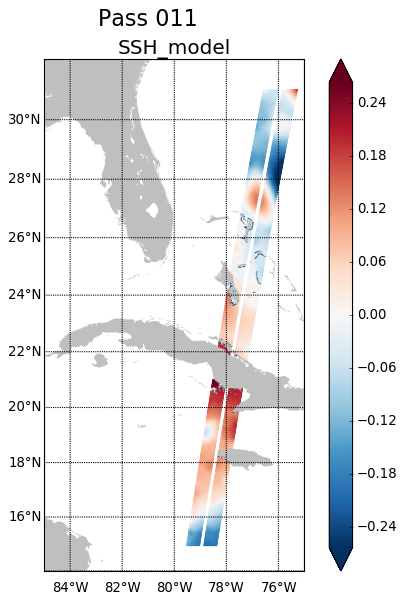

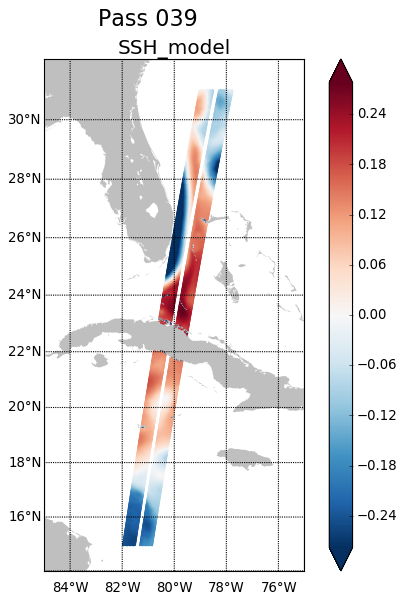

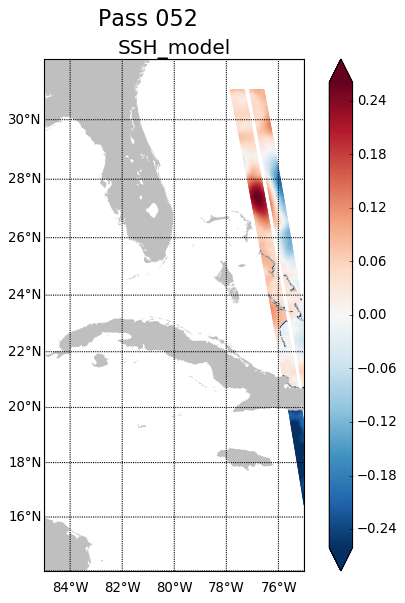

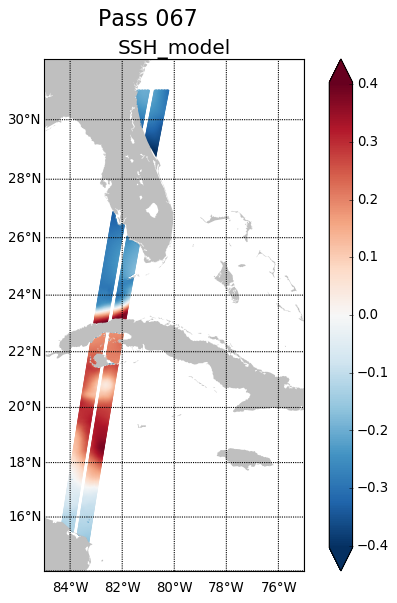

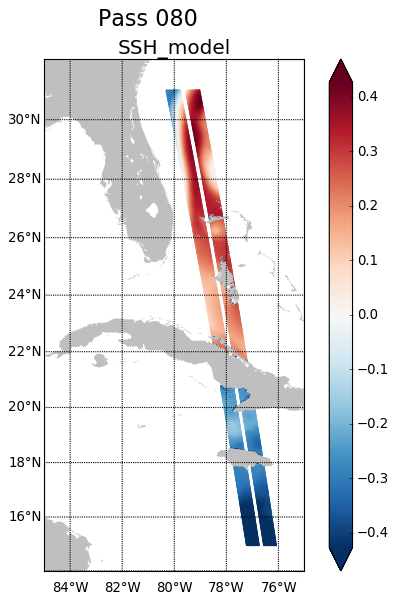

In [31]:
if __name__ == '__main__':
    cmap = 'RdBu_r'
    
    myfiles = [ x for x in myfiles if "024" not in x ]
    myfiles = [ x for x in myfiles if "026" not in x ]
    
    for ii in xrange(0, len(myfiles)):
        fig1 = plt.figure(figsize=(8, 8))  # (w,h)
        fig1.patch.set_facecolor('None')

        gs = gridspec.GridSpec(1, 3, width_ratios=[0.49, 0.49, 0.02])#, height_ratios=[1, 1, 1, 1, 1, 1])    
        
        myfile = myfiles[ii]

        with Dataset(myfile) as nc:

            lon      = nc.variables['lon'][:]
            lat      = nc.variables['lat'][:]
            SSH_model  = nc.variables['ssh_model'][:]
            SSH_obs  = nc.variables['ssh_obs'][:]

        lon[lon > 180] -= 360
        SSH_model = np.ma.masked_invalid(SSH_model)  # to mask certain value
        SSH_model = np.ma.masked_where(SSH_model==0., SSH_model)
        
        SSH_obs = np.ma.masked_invalid(SSH_obs)  # to mask certain value
        
        yy, xx = SSH_obs.shape

        SSH_obsnb = SSH_obs
        lonnb = lon
        latnb = lat
        SSH_modelnb2 = SSH_model - np.ma.mean(SSH_model)
        SSH_obsnb2 = SSH_obsnb - np.ma.mean(SSH_obsnb)
        
        vmax = SSH_modelnb2.max() 
        vmin = vmax*-1.
        
        ##################################################
        ax1 = plt.subplot(111)
        
        # Map 1
        my_map = Basemap(projection='merc', lat_0=18, lon_0=-15, 
            resolution = 'i', area_thresh = 10.0,
            llcrnrlon=-85, llcrnrlat=14,
            urcrnrlon=-75, urcrnrlat=32, ax=ax1) 

        my_map.fillcontinents(color='0.75') 
        my_map.drawmapboundary()

        my_map.drawmeridians(np.arange(-160, 140, 2), labels=[1,0,0,1])
        my_map.drawparallels(np.arange(0, 70, 2), labels=[1,0,0,1])
        
        # My map 1
        ny_t = SSH_obsnb.shape[0]; nx_t = SSH_obsnb.shape[1]
        lons_t, lats_t = my_map.makegrid(nx_t, ny_t) # get lat/lons of ny by nx evenly space grid.
        x, y = my_map(lons_t, lats_t) # compute map proj coordinates.

        c1 = my_map.scatter(lonnb, latnb, c=SSH_modelnb2, linewidth=0, vmin=vmin, vmax=vmax, s=2
                            , latlon=True, cmap=cmap) 
        
        c1.set_clim([vmin, vmax])
        ax1.set_title('SSH_model', size=18)
        
        # Colorbar:

        cbar = plt.colorbar(c1, extend='both')
        #cbar.ax.tick_params(labelsize=16)
        
        tstr = 'Pass ' + myfiles[ii].split('c01_p')[-1].split('.nc')[0]
        plt.suptitle(tstr, size=20)

        #plt.tight_layout()
        
        #savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'daily_inputs_cycle2_gradual.jpeg'
        #plt.savefig(str(savename), bbox_inches='tight', dpi=300)

        plt.show()

